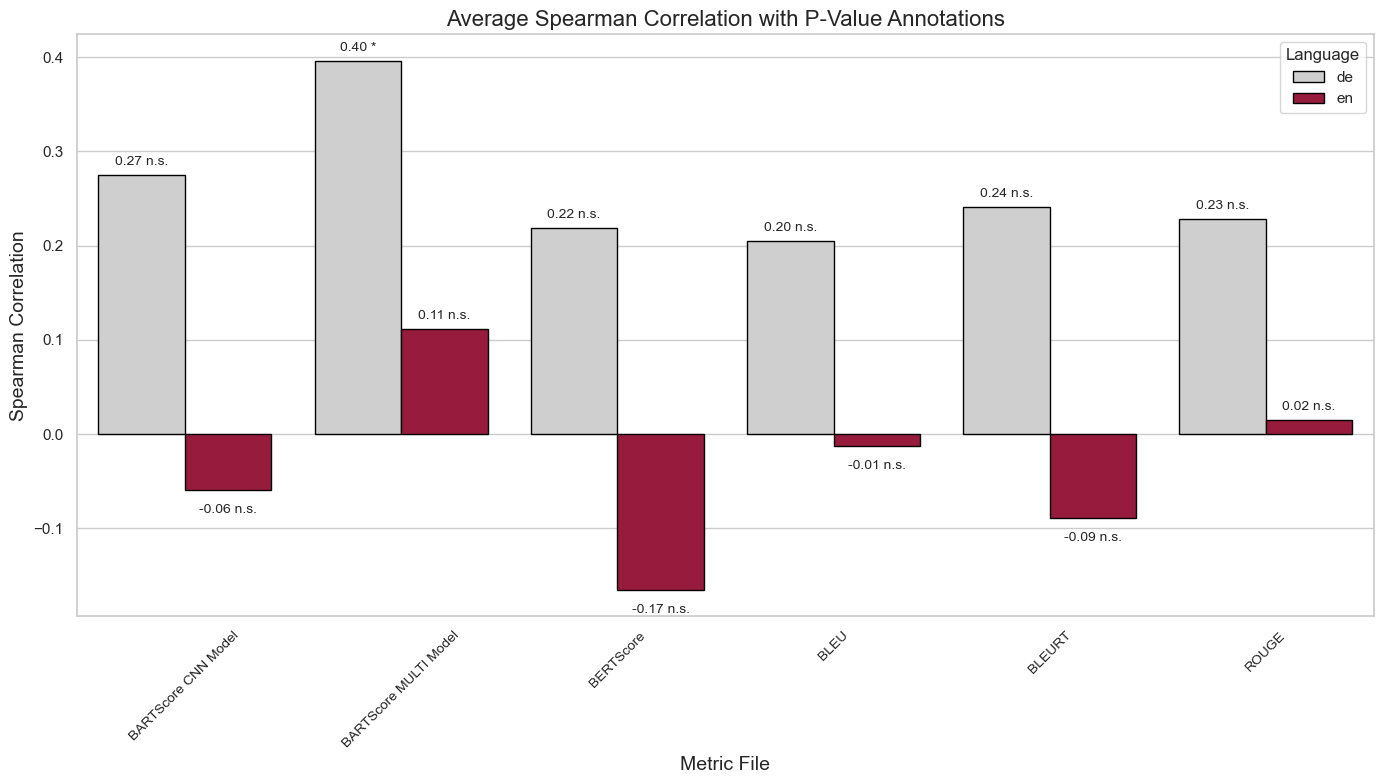

,language,metric_file,spearman_corr,p_value,metric_file_renamed
0,de,bartscore_cnn_de.csv,0.274800,0.157892,BARTScore CNN Model
1,de,bartscore_multi_de.csv,0.396110,0.042774,BARTScore MULTI Model
2,de,bertscore_evaluation_de.csv,0.218735,0.250632,BERTScore
3,de,bleu_evaluation_de.csv,0.204513,0.295680,BLEU
4,de,bleurt_evaluation_de.csv,0.241414,0.221197,BLEURT
5,de,rouge_evaluation_de.csv,0.228420,0.240941,ROUGE
6,en,bartscore_cnn_en.csv,-0.059388,0.691311,BARTScore CNN Model
7,en,bartscore_multi_en.csv,0.111569,0.563349,BARTScore MULTI Model
8,en,bertscore_evaluation_en.csv,-0.165135,0.442435,BERTScore
9,en,bleu_evaluation_en.csv,-0.012935,0.586659,BLEU


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_language_comparison_with_metrics(df, save_path=None):
    # Prepare figure
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.set(style="whitegrid")

    # Your color palette
    custom_colors = ["#cfcfcf", "#ac0634"]  # palette = {'DE': '#cfcfcf', 'EN': '#ac0634'}

    #Rename dictionary
    rename_dict = {
        "rouge_evaluation_en.csv": "ROUGE",
        "rouge_evaluation_de.csv": "ROUGE",
        "bleu_evaluation_en.csv": "BLEU",
        "bleu_evaluation_de.csv": "BLEU",
        "bertscore_evaluation_de.csv": "BERTScore",
        "bertscore_evaluation_en.csv": "BERTScore",
        "bartscore_cnn_de.csv": "BARTScore CNN Model",
        "bartscore_cnn_en.csv": "BARTScore CNN Model",
        "bartscore_multi_de.csv": "BARTScore MULTI Model",
        "bartscore_multi_en.csv": "BARTScore MULTI Model",
        "bleurt_evaluation_de.csv": "BLEURT",
        "bleurt_evaluation_en.csv": "BLEURT",
        # "llm_judge_together_no_ref_en.csv": "LLM Judge Together No Ref",
        # "llm_judge_together_no_ref_de.csv": "LLM Judge Together No Ref",
        # "llm_judge_together_with_ref_de.csv": "LLM Judge Together with Ref",
        # "llm_judge_together_with_ref_en.csv": "LLM Judge Together with Ref",
        # "llm_judge_seperate_with_ref_en.csv": "LLM Judge Separate with Ref",
        # "llm_judge_seperate_with_ref_de.csv": "LLM Judge Separate with Ref",
        # "llm_judge_seperate_no_ref_en.csv": "LLM Judge Separate No Ref",
        # "llm_judge_seperate_no_ref_de.csv": "LLM Judge Separate No Ref",
    }
    # filter out the LLM metrics
    df = df[~df["metric_file"].str.contains("llm")]
    # Prepare grouped data
    grouped = df.groupby(["language", "metric_file"]).agg(
        spearman_corr=("spearman_corr", "mean"),
        p_value=("p_value", "mean")
    ).reset_index()
    grouped["metric_file_renamed"] = grouped["metric_file"].replace(rename_dict)



    # Define custom order for x-ticks
    custom_order = [
        "ROUGE",
        "BLEU",
        "BERTScore",
        "BARTScore CNN Model",
        "BARTScore MULTI Model",
        "BLEURT",
        "LLM Judge Together No Ref",
        "LLM Judge Together with Ref",
        "LLM Judge Separate No Ref",
        "LLM Judge Separate with Ref",
    ]
    # reorder the dataframe based on the custom order
    #grouped = grouped.set_index("metric_file_renamed").loc[custom_order].reset_index()

    # Bar plot with custom colors, hue, and x-tick order
    sns.barplot(
        x="metric_file_renamed",
        y="spearman_corr",
        hue="language",
        data=grouped,
        palette=custom_colors,
        # order=custom_order,
        ax=ax,
        edgecolor='black'
    )

    # Define annotation levels
    def annotate_p_value(p):
        if p < 0.001:
            return "***"
        elif p < 0.01:
            return "**"
        elif p < 0.05:
            return "*"
        else:
            return "n.s."

    # Add annotations for bars
    for bar, (_, row) in zip(ax.patches, grouped.iterrows()):
        height = bar.get_height()
        x_pos = bar.get_x() + bar.get_width() / 2.0
        annotation = annotate_p_value(row["p_value"])
        
        
        # Handle positive and negative bars
        if height >= 0:
            ax.annotate(
                f"{height:.2f} {annotation}",
                (x_pos, height),
                ha="center", va="bottom",
                xytext=(0, 5),
                textcoords="offset points",
                fontsize=10
            )
            #print(annotation)
        else:
            ax.annotate(
                f"{height:.2f} {annotation}",
                (x_pos, height),
                ha="center", va="top",
                xytext=(0, -10),
                textcoords="offset points",
                fontsize=10
            )

    # Axis labels and legend
    ax.set_title("Average Spearman Correlation with P-Value Annotations", fontsize=16)
    ax.set_ylabel("Spearman Correlation", fontsize=14)
    ax.set_xlabel("Metric File", fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.legend(title="Language")

    plt.tight_layout()
    if save_path:
        file_path = f"{save_path}/average_spearman_correlation_multilang.png"
        plt.savefig(file_path)
        print(f"Plot saved at: {file_path}")
    plt.show()
    return grouped


# Example usage
corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
final_filtered_df = pd.read_csv(corr_path)
grouped = plot_language_comparison_with_metrics(final_filtered_df)
grouped


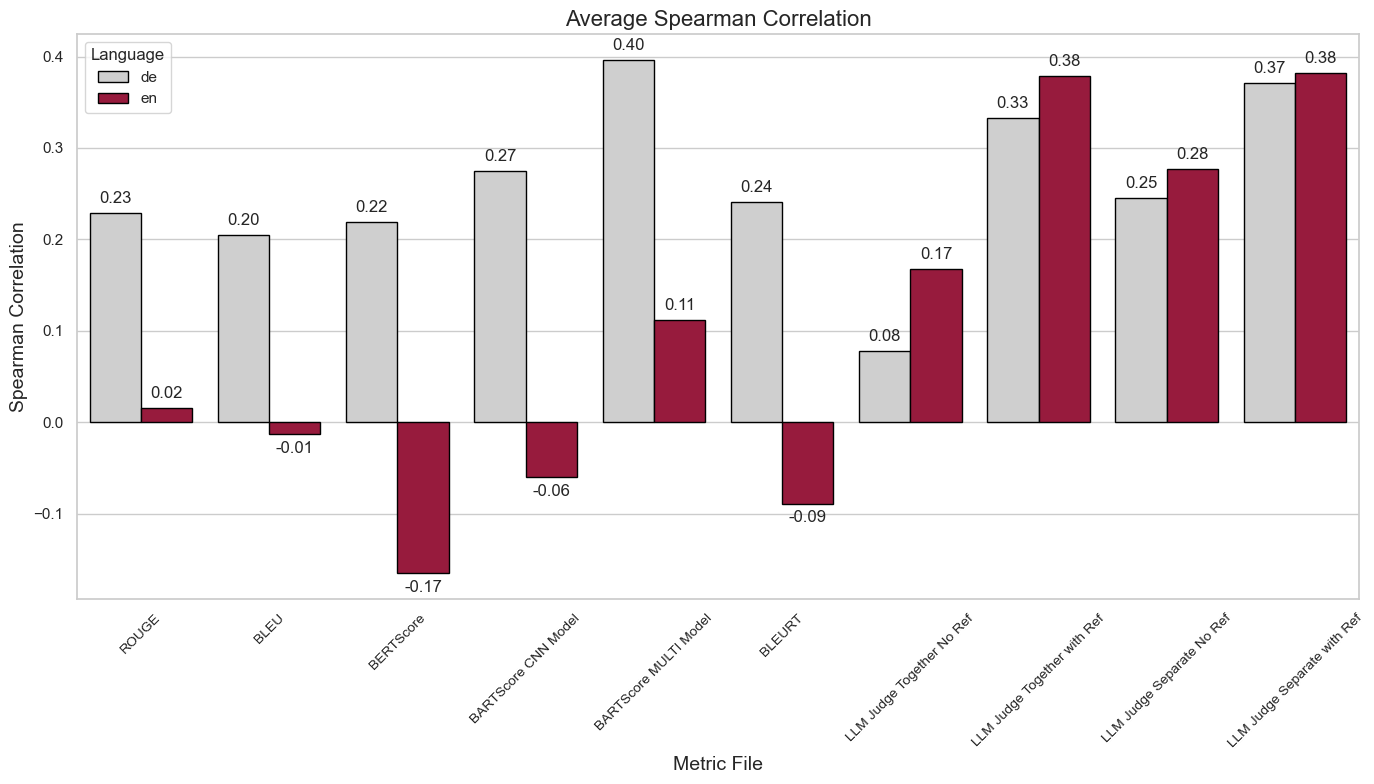

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

def plot_language_comparison_with_metrics(df, save_path=None):
    # Prepare figure
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.set(style="whitegrid")

    # Your color palette
    custom_colors = ["#cfcfcf", "#ac0634"]  # palette = {'DE': '#cfcfcf', 'EN': '#ac0634'}


    # Rename dictionary
    rename_dict = {
        "rouge_evaluation_en.csv": "ROUGE EN",
        "rouge_evaluation_de.csv": "ROUGE DE",
        "bleu_evaluation_en.csv": "BLEU EN",
        "bleu_evaluation_de.csv": "BLEU DE",
        "bertscore_evaluation_de.csv": "BERTScore DE",
        "bertscore_evaluation_en.csv": "BERTScore EN",
        "bartscore_cnn_de.csv": "BARTScore CNN Model DE",
        "bartscore_cnn_en.csv": "BARTScore CNN Model EN",
        "bartscore_multi_de.csv": "BARTScore MULTI Model DE",
        "bartscore_multi_en.csv": "BARTScore MULTI Model EN",
        "bleurt_evaluation_de.csv": "BLEURT DE",
        "bleurt_evaluation_en.csv": "BLEURT EN",
        "llm_judge_together_no_ref_en.csv": "LLM Judge Together No Ref EN",
        "llm_judge_together_no_ref_de.csv": "LLM Judge Together No Ref DE",
        "llm_judge_together_with_ref_de.csv": "LLM Judge Together with Ref DE",
        "llm_judge_together_with_ref_en.csv": "LLM Judge Together with Ref EN",
        "llm_judge_seperate_with_ref_en.csv": "LLM Judge Separate with Ref EN",
        "llm_judge_seperate_with_ref_de.csv": "LLM Judge Separate with Ref DE",
        "llm_judge_seperate_no_ref_en.csv": "LLM Judge Separate No Ref EN",
        "llm_judge_seperate_no_ref_de.csv": "LLM Judge Separate No Ref DE",
    }

    grouped = df.groupby(["language", "metric_file"])["spearman_corr"].mean().reset_index()
    grouped["metric_file_renamed"] = grouped["metric_file"].replace(rename_dict)

    
    # Define custom order for x-ticks
    custom_order = [
        "ROUGE",
        "BLEU",
        "BERTScore",
        "BARTScore CNN Model",
        "BARTScore MULTI Model",
        "BLEURT",
        "LLM Judge Together No Ref",
        "LLM Judge Together with Ref",
        "LLM Judge Separate No Ref",
        "LLM Judge Separate with Ref",
    ]

    # Bar plot with custom colors, hue, and x-tick order
    sns.barplot(
        x="metric_file_renamed",
        y="spearman_corr",
        hue="language",
        data=grouped,
        palette=custom_colors,
        order=custom_order,
        ax=ax,
        edgecolor='black'
    )

    # Add annotations
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with height greater than 0
            ax.annotate(
                f"{height:.2f}",
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="bottom",
                xytext=(0, 5),
                textcoords="offset points"
            )
        elif height < 0:
            ax.annotate(
                f"{height:.2f}",
                (p.get_x() + p.get_width() / 2., height),
                ha="center", va="top",
                xytext=(0, -5),
                textcoords="offset points"
            )

    # Axis labels and legend
    ax.set_title("Average Spearman Correlation", fontsize=16)
    ax.set_ylabel("Spearman Correlation", fontsize=14)
    ax.set_xlabel("Metric File", fontsize=14)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.legend(title="Language")

    plt.tight_layout()
    if save_path:
        file_path = f"{save_path}/average_spearman_correlation_multilang.png"
        plt.savefig(file_path)
        print(f"Plot saved at: {file_path}")
    plt.show()


corr_path = "../../../data/eval/correlation/correlation_splits_filtered_llm.csv"
final_filtered_df = pd.read_csv(corr_path)
# p_filtered_df = final_filtered_df[final_filtered_df["p_value"] < 0.05]
# plot_language_comparison_with_metrics(p_filtered_df)
plot_language_comparison_with_metrics(final_filtered_df)